In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 30)


In [14]:
#The file Scrobble_Features.csv provides in-depth information about music tracks, including genre, duration, popularity, 
#explicit content, danceability, energy, key signature, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, and time signature
data = pd.read_csv('./Scrobble_Features.csv')
data.head()

,index,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_popularity,spotify_track_explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0,Hide in Your ShellSupertramp,Supertramp,Hide in Your Shell,"['album rock', 'art rock', 'classic rock', 'gl...",0ldE7rHWykc9OUViCzdviV,NaN,409889.0,51.0,False,0.476,0.355,7.0,-12.843,0.0,0.0429,0.471000,0.000074,0.2970,0.319,111.667,4.0
1,1,Vento k h o,o k h o,Vent,"['chillhop', 'lo-fi beats', 'phonk']",3wJTCCMHtuOdDg4fJzkd0i,https://p.scdn.co/mp3-preview/17715e8450561f32...,164935.0,54.0,False,0.459,0.518,10.0,-9.398,0.0,0.0783,0.513000,0.219000,0.1710,0.224,77.703,4.0
2,2,Cesaro SummabilityTool,Tool,Cesaro Summability,"['alternative metal', 'alternative rock', 'art...",6xttnk5U2VMVCaihaD0RPE,https://p.scdn.co/mp3-preview/e12b11bf6cdcdff4...,86226.0,46.0,False,0.342,0.343,11.0,-21.736,0.0,0.1910,0.000799,0.779000,0.0832,0.196,115.350,4.0
3,3,Dyslexic HeartPaul Westerberg,Paul Westerberg,Dyslexic Heart,"['alternative country', 'alternative pop', 'al...",6h0lrpGtRIwbBiPHthDB3o,https://p.scdn.co/mp3-preview/ab43e42aa0b89500...,271200.0,49.0,False,0.637,0.902,0.0,-5.064,1.0,0.0292,0.039100,0.000004,0.1280,0.843,136.575,4.0
4,4,Loan Me A DimeBoz Scaggs,Boz Scaggs,Loan Me A Dime,"['adult standards', 'album rock', 'art rock', ...",05LTrpC9z6YpTPmaeGC9kQ,https://p.scdn.co/mp3-preview/595502b0217df464...,751920.0,44.0,False,0.392,0.471,9.0,-10.518,0.0,0.0377,0.309000,0.057700,0.2870,0.382,139.957,4.0


## Basic Data Understanding of the Data

In [15]:
data.shape

(13396, 22)

In [17]:
data.head(10)

,index,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_popularity,spotify_track_explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0,Hide in Your ShellSupertramp,Supertramp,Hide in Your Shell,"['album rock', 'art rock', 'classic rock', 'gl...",0ldE7rHWykc9OUViCzdviV,NaN,409889.0,51.0,False,0.476,0.355,7.0,-12.843,0.0,0.0429,0.471000,0.000074,0.2970,0.319,111.667,4.0
1,1,Vento k h o,o k h o,Vent,"['chillhop', 'lo-fi beats', 'phonk']",3wJTCCMHtuOdDg4fJzkd0i,https://p.scdn.co/mp3-preview/17715e8450561f32...,164935.0,54.0,False,0.459,0.518,10.0,-9.398,0.0,0.0783,0.513000,0.219000,0.1710,0.224,77.703,4.0
2,2,Cesaro SummabilityTool,Tool,Cesaro Summability,"['alternative metal', 'alternative rock', 'art...",6xttnk5U2VMVCaihaD0RPE,https://p.scdn.co/mp3-preview/e12b11bf6cdcdff4...,86226.0,46.0,False,0.342,0.343,11.0,-21.736,0.0,0.1910,0.000799,0.779000,0.0832,0.196,115.350,4.0
3,3,Dyslexic HeartPaul Westerberg,Paul Westerberg,Dyslexic Heart,"['alternative country', 'alternative pop', 'al...",6h0lrpGtRIwbBiPHthDB3o,https://p.scdn.co/mp3-preview/ab43e42aa0b89500...,271200.0,49.0,False,0.637,0.902,0.0,-5.064,1.0,0.0292,0.039100,0.000004,0.1280,0.843,136.575,4.0
4,4,Loan Me A DimeBoz Scaggs,Boz Scaggs,Loan Me A Dime,"['adult standards', 'album rock', 'art rock', ...",05LTrpC9z6YpTPmaeGC9kQ,https://p.scdn.co/mp3-preview/595502b0217df464...,751920.0,44.0,False,0.392,0.471,9.0,-10.518,0.0,0.0377,0.309000,0.057700,0.2870,0.382,139.957,4.0
5,5,To the WorldWitrash,Witrash,To the World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,The Wreck of the Edmund FitzgeraldGordon Light...,Gordon Lightfoot,The Wreck of the Edmund Fitzgerald,"['album rock', 'canadian country', 'canadian f...",536L9C0N7vhYdibCJx3cI2,https://p.scdn.co/mp3-preview/0ba5642161214b5a...,389280.0,59.0,False,0.308,0.376,4.0,-15.240,1.0,0.0626,0.116000,0.000003,0.1660,0.158,186.047,3.0
7,7,IonsShredders,Shredders,Ions,"['abstract hip hop', 'minnesota hip hop']",1DPvwjfw97lQBPlqJ155gn,https://p.scdn.co/mp3-preview/15fbc6ada9411621...,195937.0,29.0,True,0.745,0.806,4.0,-6.671,0.0,0.1780,0.013600,0.000000,0.0751,0.439,80.024,4.0
8,8,The Middle - Acoustic VersionJimmy Eat World,Jimmy Eat World,The Middle - Acoustic Version,"['modern rock', 'neo mellow', 'pop punk', 'pop...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,Easy RiderEddie Berman,Eddie Berman,Easy Rider,"['chamber pop', 'deep new americana', 'indie f...",3MCaKeccHJ13bLYCEQtQFq,https://p.scdn.co/mp3-preview/571f8cd7145f607e...,229800.0,51.0,False,0.569,0.472,4.0,-10.222,1.0,0.0263,0.499000,0.017000,0.1100,0.326,115.359,4.0


In [18]:
data.tail()

,index,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_popularity,spotify_track_explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
13391,13391,PTPBlack Joe Lewis & The Honeybears,Black Joe Lewis & The Honeybears,PTP,"['funk', 'garage rock', 'modern blues', 'moder...",5d6oq1PmYSB50H0aHj7jrH,https://p.scdn.co/mp3-preview/e0af9bf03a85b313...,173026.0,30.0,False,0.652,0.880,11.0,-3.623,0.0,0.0470,0.008860,0.000179,0.1380,0.7960,105.975,4.0
13392,13392,All She Wants To Do Is DanceDon Henley,Don Henley,All She Wants To Do Is Dance,"['album rock', 'art rock', 'classic rock', 'co...",4yCRCEAfCMRyqCpBSd0qDp,NaN,269106.0,54.0,False,0.702,0.558,7.0,-11.952,1.0,0.0288,0.030400,0.000000,0.0528,0.9030,114.932,4.0
13393,13393,Seek & Destroy (Live - Seattle '89)Metallica,Metallica,Seek & Destroy (Live - Seattle '89),"['alternative metal', 'hard rock', 'metal', 'o...",5XehKCJutge72GlijNcPHW,https://p.scdn.co/mp3-preview/4f0d2a6cd211ebbd...,541535.0,27.0,True,0.240,0.988,9.0,-6.468,1.0,0.2180,0.000083,0.067600,0.9840,0.0601,150.949,4.0
13394,13394,ClassicMKTO,MKTO,Classic,"['australian pop', 'dance pop', 'pop', 'pop ra...",6FE2iI43OZnszFLuLtvvmg,https://p.scdn.co/mp3-preview/2fabd6cedd99b5dc...,175426.0,77.0,False,0.720,0.791,1.0,-4.689,1.0,0.1240,0.038400,0.000000,0.1570,0.7560,102.071,4.0
13395,13395,Blitzkrieg (Remastered)Metallica,Metallica,Blitzkrieg (Remastered),"['alternative metal', 'hard rock', 'metal', 'o...",3EcGFrVhz4gco6laJDZ7WU,https://p.scdn.co/mp3-preview/03e9539278b720f7...,216800.0,46.0,False,0.485,0.972,4.0,-6.047,0.0,0.0591,0.000154,0.443000,0.0899,0.6060,98.983,4.0


In [19]:
data.dtypes

index                          int64
SongID                        object
Performer                     object
Song                          object
spotify_genre                 object
spotify_track_id              object
spotify_track_preview_url     object
spotify_track_duration_ms    float64
spotify_track_popularity     float64
spotify_track_explicit        object
danceability                 float64
energy                       float64
key                          float64
loudness                     float64
mode                         float64
speechiness                  float64
acousticness                 float64
instrumentalness             float64
liveness                     float64
valence                      float64
tempo                        float64
time_signature               float64
dtype: object

In [21]:
data.describe()

,index,spotify_track_duration_ms,spotify_track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,13396.000000,1.184300e+04,11843.000000,11843.000000,11843.000000,11843.000000,11843.000000,11843.000000,11843.000000,11843.000000,11843.000000,11843.000000,11843.000000,11843.000000,11843.000000
mean,6697.500000,2.367184e+05,46.226463,0.563948,0.633178,5.202060,-8.224704,0.674069,0.083196,0.268218,0.116702,0.199220,0.507471,119.742096,3.924090
std,3867.236438,8.774836e+04,17.322206,0.159638,0.233469,3.547533,4.174657,0.468741,0.105924,0.302263,0.260084,0.177449,0.241694,30.568219,0.360707
min,0.000000,3.040000e+04,0.000000,0.000000,0.000898,0.000000,-42.238000,0.000000,0.000000,0.000001,0.000000,0.010200,0.000000,0.000000,0.000000
25%,3348.750000,1.899060e+05,33.000000,0.456500,0.476000,2.000000,-9.988500,0.000000,0.034800,0.016100,0.000001,0.095500,0.322000,95.110500,4.000000
50%,6697.500000,2.243060e+05,46.000000,0.571000,0.663000,5.000000,-7.300000,1.000000,0.047900,0.134000,0.000231,0.126000,0.505000,116.988000,4.000000
75%,10046.250000,2.672795e+05,59.000000,0.676000,0.821000,8.000000,-5.423500,1.000000,0.082400,0.459000,0.031400,0.244000,0.696500,139.992500,4.000000
max,13395.000000,1.561133e+06,99.000000,0.979000,1.000000,11.000000,0.576000,1.000000,0.955000,0.996000,0.994000,0.996000,0.994000,232.690000,5.000000


## Data Preparation of the Data

In [26]:
#Dropping irrelevant columns
data= data[['index', 'SongID', 'Performer', 'Song', 'spotify_genre',
       #'spotify_track_id', 'spotify_track_preview_url',
       'spotify_track_duration_ms', 'spotify_track_popularity',
       'spotify_track_explicit', 'danceability', 'energy', 
       #'key', 
       'loudness',
       #'mode', 
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       #'valence', 'tempo', 'time_signature'
       ]]


In [29]:
#Check for nulls
data.isna().sum()

index                           0
SongID                          0
Performer                       0
Song                            0
spotify_genre                 473
spotify_track_id             1553
spotify_track_preview_url    4426
spotify_track_duration_ms    1553
spotify_track_popularity     1553
spotify_track_explicit       1553
danceability                 1553
energy                       1553
loudness                     1553
speechiness                  1553
acousticness                 1553
instrumentalness             1553
liveness                     1553
dtype: int64

In [33]:
#Check for duplicated data
data.loc[data.duplicated()]

,index,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_popularity,spotify_track_explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness


In [37]:
#Drop null rows
data.dropna(inplace=True)

In [44]:
data.head()

,index,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_popularity,spotify_track_explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness
1,1,Vento k h o,o k h o,Vent,"['chillhop', 'lo-fi beats', 'phonk']",3wJTCCMHtuOdDg4fJzkd0i,https://p.scdn.co/mp3-preview/17715e8450561f32...,164935.0,54.0,False,0.459,0.518,-9.398,0.0783,0.513000,0.219000,0.1710
2,2,Cesaro SummabilityTool,Tool,Cesaro Summability,"['alternative metal', 'alternative rock', 'art...",6xttnk5U2VMVCaihaD0RPE,https://p.scdn.co/mp3-preview/e12b11bf6cdcdff4...,86226.0,46.0,False,0.342,0.343,-21.736,0.1910,0.000799,0.779000,0.0832
3,3,Dyslexic HeartPaul Westerberg,Paul Westerberg,Dyslexic Heart,"['alternative country', 'alternative pop', 'al...",6h0lrpGtRIwbBiPHthDB3o,https://p.scdn.co/mp3-preview/ab43e42aa0b89500...,271200.0,49.0,False,0.637,0.902,-5.064,0.0292,0.039100,0.000004,0.1280
4,4,Loan Me A DimeBoz Scaggs,Boz Scaggs,Loan Me A Dime,"['adult standards', 'album rock', 'art rock', ...",05LTrpC9z6YpTPmaeGC9kQ,https://p.scdn.co/mp3-preview/595502b0217df464...,751920.0,44.0,False,0.392,0.471,-10.518,0.0377,0.309000,0.057700,0.2870
6,6,The Wreck of the Edmund FitzgeraldGordon Light...,Gordon Lightfoot,The Wreck of the Edmund Fitzgerald,"['album rock', 'canadian country', 'canadian f...",536L9C0N7vhYdibCJx3cI2,https://p.scdn.co/mp3-preview/0ba5642161214b5a...,389280.0,59.0,False,0.308,0.376,-15.240,0.0626,0.116000,0.000003,0.1660


## Feature Understanding & Relationships

C:\Users\Admin\AppData\Local\Temp\ipykernel_34904\1138895369.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_performers.index, y=top_performers.values, palette='rocket')


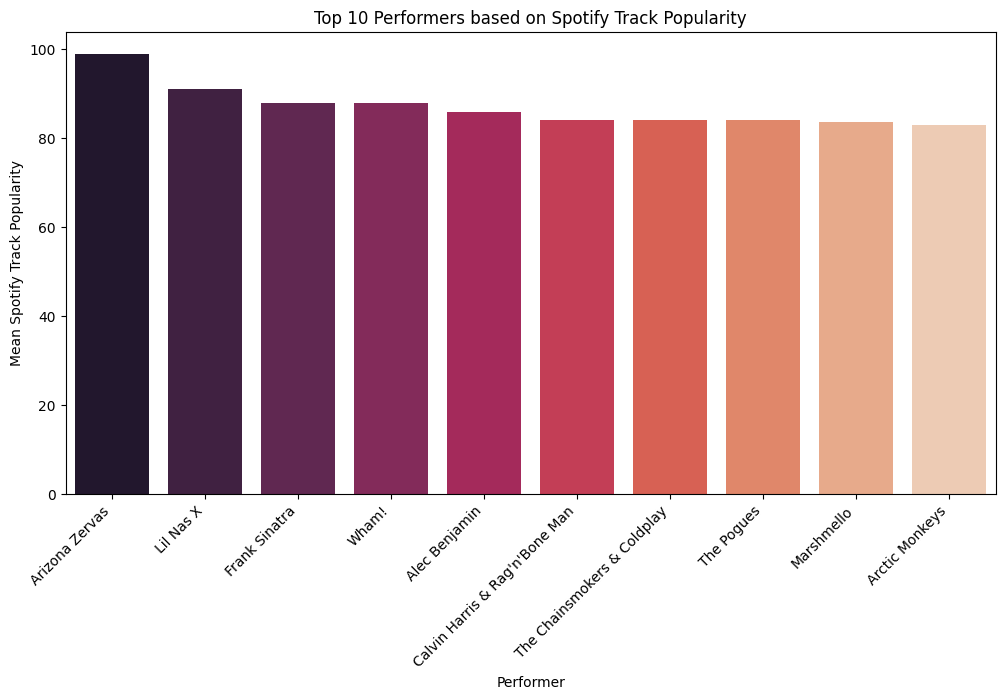

In [53]:
#Check for the top_performers by track popularity
top_performers = data.groupby('Performer')['spotify_track_popularity'].mean().nlargest(10)

# Create a bar plot for the top 10 performers
plt.figure(figsize=(12, 6))
sns.barplot(x=top_performers.index, y=top_performers.values, palette='rocket')
plt.title('Top 10 Performers based on Spotify Track Popularity')
plt.xlabel('Performer')
plt.ylabel('Mean Spotify Track Popularity')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_34904\1193751692.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette='mako')


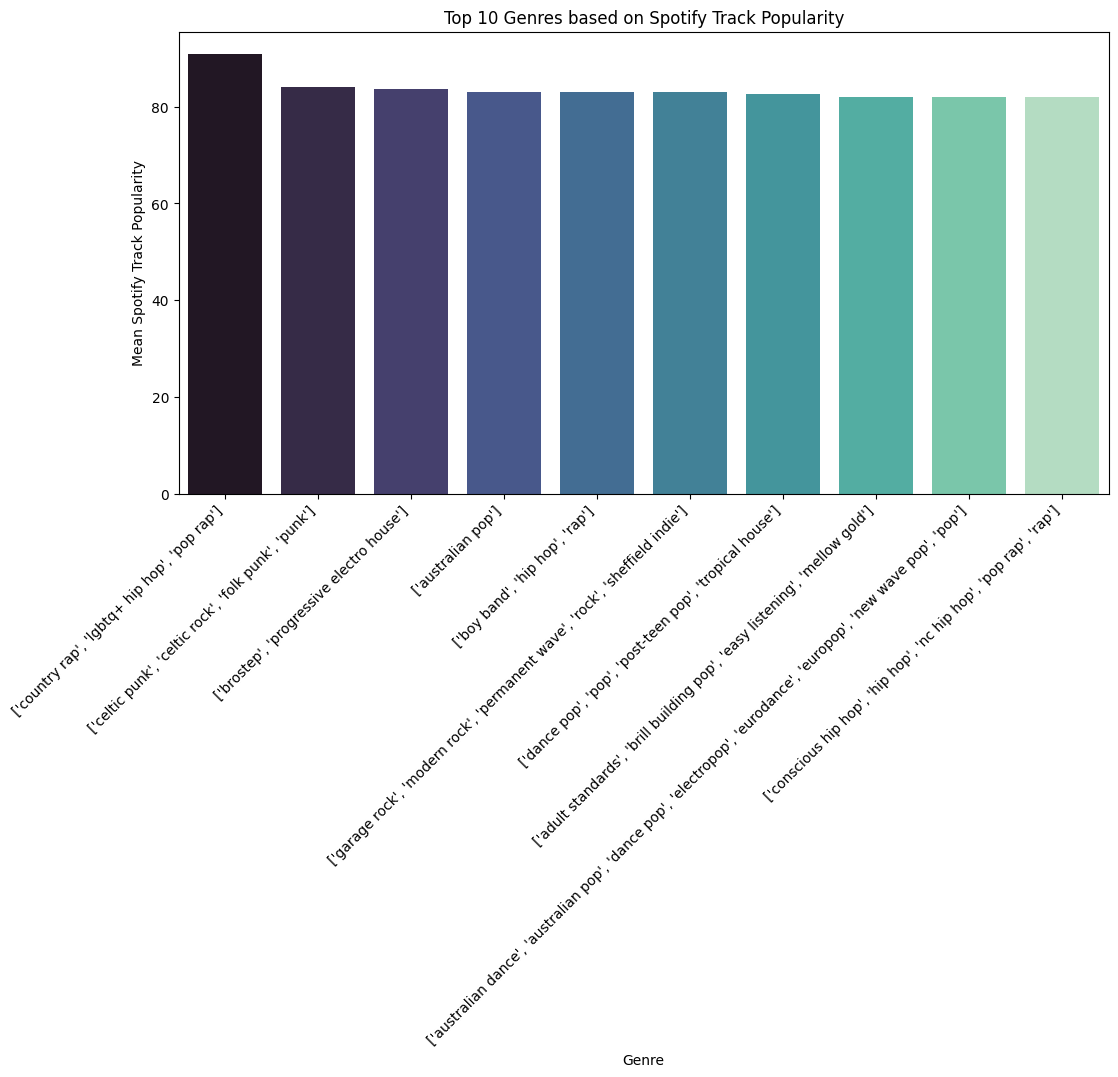

In [54]:
#Check for the top genre by spotify_track_popularity
top_genres = data.groupby('spotify_genre')['spotify_track_popularity'].mean().nlargest(10)

# Create a bar plot for the top 10 genres
plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.index, y=top_genres.values, palette='mako')
plt.title('Top 10 Genres based on Spotify Track Popularity')
plt.xlabel('Genre')
plt.ylabel('Mean Spotify Track Popularity')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()
